In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.models import load_model
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/legend_classification/train'
valid_path = '/content/drive/MyDrive/legend_classification/val'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/legend_classification/train/*')
len(folders)

2

In [ ]:
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import optimizers

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'])
train_datagen = ImageDataGenerator(rescale=1./225, width_shift_range=0.1, height_shift_range=0.1)
test_datagen = ImageDataGenerator(rescale=1./225)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/legend_classification/train', target_size=(224, 224), batch_size=1, class_mode='categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/legend_classification/val', target_size=(224, 224), batch_size=1, class_mode='categorical')

Found 100 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [ ]:
cla = test_set.classes
print(cla)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
r = model.fit(training_set, validation_batch_size=test_set, epochs=120, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/120
100/100 [==============================] - 47s 426ms/step - loss: 0.4825 - accuracy: 0.8500
Epoch 2/120
100/100 [==============================] - 3s 26ms/step - loss: 0.1370 - accuracy: 0.9800
Epoch 3/120
100/100 [==============================] - 2s 23ms/step - loss: 0.1573 - accuracy: 0.9400
Epoch 4/120
100/100 [==============================] - 2s 23ms/step - loss: 0.2412 - accuracy: 0.9400
Epoch 5/120
100/100 [==============================] - 2s 23ms/step - loss: 0.0354 - accuracy: 0.9900
Epoch 6/120
100/100 [==============================] - 3s 32ms/step - loss: 0.0171 - accuracy: 0.9900
Epoch 7/120
100/100 [==============================] - 2s 23ms/step - loss: 0.3623 - accuracy: 0.9300
Epoch 8/120
100/100 [==============================] - 2s 23ms/step - loss: 0.0190 - accuracy: 0.9900
Epoch 9/120
100/100 [==============================] - 2s 23ms/step - loss: 3.2988e-04 - accuracy: 1.0000
Epoch 10/120
100/100 [==============================] - 3s 28ms/step - loss:

In [ ]:
model.save = ('/content/drive/MyDrive/legend_classification/my.h5')
print('Your model is saved in ==> ', model)

Your model is saved in ==>  <keras.src.engine.functional.Functional object at 0x7ff474b16590>


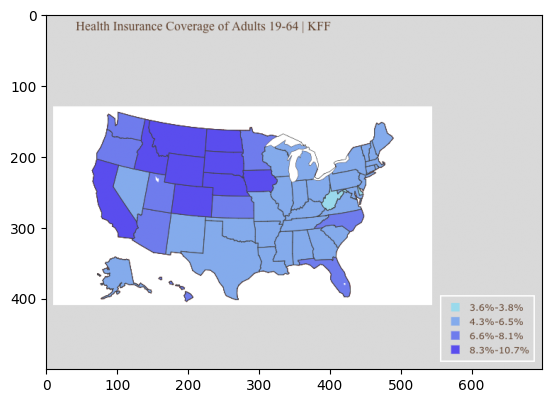

In [ ]:
img = cv2.imread('/content/drive/MyDrive/legend_classification/test_01/map_16.png')
img = img/255
plt.imshow(img)

In [ ]:
path = '/content/drive/MyDrive/legend_classification/test_01/map_16.png'

1/1 [==============================] - 0s 21ms/step
[[0. 1.]]


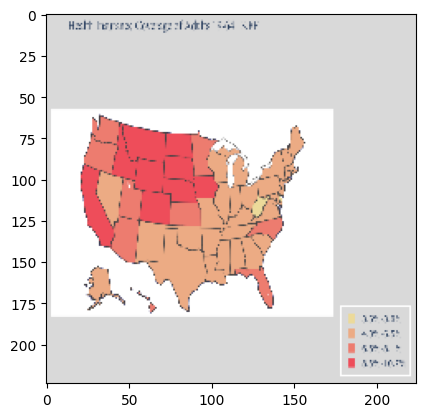

In [ ]:
from keras.preprocessing import image
from keras.utils import load_img
img = load_img(path, target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
print(output)

In [ ]:
output

array([[0., 1.]], dtype=float32)

In [ ]:
# predictions = np.array([[1, 0], [0, 1]])

# predicted_labels = np.argmax(predictions, axis=1)
# print(predicted_labels)

In [ ]:
# images_directory = '/content/drive/MyDrive/legend_classification/test/'

In [ ]:
# for filename in os.listdir(images_directory):
#     if filename.endswith('.png'):
#         path = os.path.join(images_directory, filename)

#         img = load_img(path, target_size=(224, 224))
#         img = np.asarray(img) / 255
#         img = np.expand_dims(img, axis=0)

#         output = model.predict(img)
#         print(output)

#         if output[0][0] > 0.5:
#             save_path = os.path.join('/content/drive/MyDrive/legend_classification/results/choropleth/', filename)
#         else:
#             save_path = os.path.join('/content/drive/MyDrive/pdf_image_classifier/results/isocline/', filename)

#         cv2.imwrite(save_path, cv2.imread(path))

1/1 [==============================] - 0s 158ms/step
[[1.0000000e+00 8.4400836e-14]]
1/1 [==============================] - 0s 19ms/step
[[2.0836604e-13 1.0000000e+00]]
1/1 [==============================] - 0s 18ms/step
[[1.0000000e+00 3.5597054e-08]]
1/1 [==============================] - 0s 18ms/step
[[0.04849649 0.9515035 ]]
1/1 [==============================] - 0s 18ms/step
[[1.0000000e+00 6.9424685e-13]]
1/1 [==============================] - 0s 18ms/step
[[9.9999976e-01 1.8825955e-07]]


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import csv

csv_file = '/content/drive/MyDrive/legend_classification/results_01/classification_results.csv'
with open(csv_file, mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['File Name', 'Type'])

images_directory = '/content/drive/MyDrive/legend_classification/test_01'

for filename in os.listdir(images_directory):
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        path = os.path.join(images_directory, filename)

        img = load_img(path, target_size=(224, 224))
        img = np.asarray(img) / 255
        img = np.expand_dims(img, axis=0)

        output = model.predict(img)
        print(output)

        if output[0][0] > 0.5:
            file_type = 'continuous'
            save_path = os.path.join('/content/drive/MyDrive/legend_classification/results/continuous', filename)
        else:
            file_type = 'discrete'
            save_path = os.path.join('/content/drive/MyDrive/legend_classification/results/discrete', filename)

        with open(csv_file, mode='a') as file:
            writer = csv.writer(file)
            writer.writerow([filename, file_type])

        cv2.imwrite(save_path, cv2.imread(path))

1/1 [==============================] - 1s 558ms/step
[[1.000000e+00 1.029879e-16]]
1/1 [==============================] - 0s 30ms/step
[[1.0000000e+00 1.6604387e-19]]
1/1 [==============================] - 0s 39ms/step
[[1.000000e+00 2.501381e-12]]
1/1 [==============================] - 0s 117ms/step
[[1.0000000e+00 2.1048858e-18]]
1/1 [==============================] - 0s 19ms/step
[[1.000000e+00 6.388873e-21]]
1/1 [==============================] - 0s 18ms/step
[[1.0000000e+00 4.6015535e-15]]
1/1 [==============================] - 0s 19ms/step
[[1.6011763e-13 1.0000000e+00]]
1/1 [==============================] - 0s 19ms/step
[[3.6640486e-05 9.9996340e-01]]
1/1 [==============================] - 0s 21ms/step
[[0.9786462  0.02135382]]
1/1 [==============================] - 0s 19ms/step
[[1.5536104e-09 1.0000000e+00]]
1/1 [==============================] - 0s 18ms/step
[[1.8292843e-13 1.0000000e+00]]
1/1 [==============================] - 0s 18ms/step
[[0.07887132 0.92112863]]
1/1 [===

In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/drive/MyDrive/legend_classification/results_01/2updated_output_objects.csv")
df2 = pd.read_csv("/content/drive/MyDrive/legend_classification/results_01/classification_results.csv")

result = pd.merge(df1, df2, on='File Name')

result.to_csv("/content/drive/MyDrive/legend_classification/results_01/final.csv", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/legend_classification/results_01/final.csv")

def modify_values(value):
    if isinstance(value, str):
        values = value.strip('()').split(',')
        modified_values = (values[1], values[2], values[4], values[5])
        return str(modified_values)
    else:
        return value

columns_to_modify = ['Map Coordinates','Title Coordinates','Legend Coordinates']
for column in columns_to_modify:
    df[column] = df[column].apply(modify_values)

df.to_csv("/content/drive/MyDrive/legend_classification/results_01/final_legend_annotation.csv", index=False)